In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [22]:
# https://www.kaggle.com/datasets/playlist/mnistzip/
!unzip archive.zip

In [4]:
im = read_image('mnist_png/valid/9/9497.png')

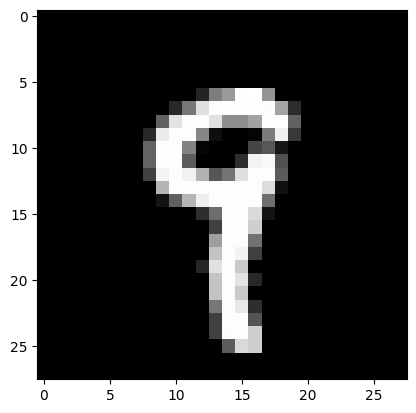

In [9]:
plt.imshow(im.permute(1, 2, 0)/255, cmap='gray')

In [10]:
root_dir = 'mnist_png'

In [11]:
import pathlib

In [15]:
class MNIST_dataset(Dataset):
  def __init__(self, path_to_data):
    super().__init__()
    self.path_to_data = pathlib.Path(path_to_data)
    self.paths = list(self.path_to_data.rglob('*.png'))

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
     return read_image(self.paths[index].as_posix()).squeeze(dim=0)/255, \
        torch.tensor(int(self.paths[index].as_posix().split('/')[-2]))

In [16]:
train_data = MNIST_dataset(root_dir)

In [19]:
val_data = MNIST_dataset(root_dir+'/valid')

In [20]:
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_data_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [21]:
import torch.nn as nn
from torch.optim import Adam

In [ ]:
class MyModel(nn.Module):
  def __init__(self, h_d):
    super().__init__()
    self.f = nn.Sequential(nn.Flatten(1,-1),
      nn.Linear(28*28, h_d),
      nn.ReLU(),
      nn.Linear(h_d, 10),
      #self.out = nn.Softmax(-1)
      )

  def forward(self, x):
      # o= self.flat(x)
      # o = self.fc1(o)
      # o = self.a(o)
      # o = self.fc2(o)
      return self.f(x) #self.out(o)